<a href="https://colab.research.google.com/github/AnnRoseKJose/Data-science/blob/main/DL_main_project(Car%20model%20prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import cv2
from glob import glob
import pathlib

In [ ]:
data = pathlib.Path('/content/drive/MyDrive/Cars')

In [ ]:
image_data = list(data.glob('*'))
image_data

[PosixPath('/content/drive/MyDrive/Cars/Van'),
 PosixPath('/content/drive/MyDrive/Cars/Sedan'),
 PosixPath('/content/drive/MyDrive/Cars/Hatchback'),
 PosixPath('/content/drive/MyDrive/Cars/Humans'),
 PosixPath('/content/drive/MyDrive/Cars/SUV')]

In [ ]:
Hatchback = list(data.glob('Hatchback/*'))
len(Hatchback)

553

In [ ]:
Sedan = list(data.glob('Sedan/*'))
len(Sedan)

1903

In [ ]:
SUV = list(data.glob('SUV/*'))
len(SUV)

1435

In [ ]:
Van = list(data.glob('Van/*'))
len(Van)

253

In [ ]:
Humans = list(data.glob('Humans/*'))
len(Humans)

559

In [ ]:
data_dict = {'Hatchback':Hatchback, 'Sedan':Sedan, 'SUV':SUV, 'Van':Van, 'Humans':Humans}
data_class = {'Hatchback':0, 'Sedan':1, 'SUV':2, 'Van':3, 'Humans':4}

In [ ]:
x = [] #to get train set and test set
y = []

In [ ]:
for i in data_dict:
  data_path_list = data_dict[i]

  for j in data_path_list:
    img = cv2.imread(str(j))
    img = cv2.resize(img,(224,224))

    x.append(img)
    cls = data_class[i]
    y.append(cls)

In [ ]:
len(x)

4703

In [ ]:
len(y)

4703

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.75,random_state=1)

In [ ]:
xtrain[0].shape

(224, 224, 3)

In [ ]:
xtest[0].shape

(224, 224, 3)

In [ ]:
from tensorflow.keras import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
his = model.fit(np.array(xtrain),np.array(ytrain),epochs=10,batch_size=200,verbose=1,validation_data=(np.array(xtest),np.array(ytest)))

Epoch 1/10
18/18 [==============================] - 30s 752ms/step - loss: 1128.5902 - accuracy: 0.2977 - val_loss: 1.4283 - val_accuracy: 0.4150
Epoch 2/10
18/18 [==============================] - 7s 386ms/step - loss: 1.3658 - accuracy: 0.4398 - val_loss: 1.3855 - val_accuracy: 0.4371
Epoch 3/10
18/18 [==============================] - 8s 425ms/step - loss: 1.0226 - accuracy: 0.6141 - val_loss: 1.4502 - val_accuracy: 0.4464
Epoch 4/10
18/18 [==============================] - 7s 389ms/step - loss: 0.4621 - accuracy: 0.8390 - val_loss: 1.7025 - val_accuracy: 0.4847
Epoch 5/10
18/18 [==============================] - 7s 393ms/step - loss: 0.1714 - accuracy: 0.9600 - val_loss: 2.2651 - val_accuracy: 0.5017
Epoch 6/10
18/18 [==============================] - 7s 394ms/step - loss: 0.0633 - accuracy: 0.9895 - val_loss: 3.1098 - val_accuracy: 0.4966
Epoch 7/10
18/18 [==============================] - 7s 398ms/step - loss: 0.0343 - accuracy: 0.9952 - val_loss: 3.5331 - val_accuracy: 0.5306
Ep

In [ ]:
model.save('cars.h5')

In [ ]:
hist=his.history
hist

{'loss': [1128.5902099609375,
  1.3657946586608887,
  1.0226277112960815,
  0.46210503578186035,
  0.1713722050189972,
  0.0633130818605423,
  0.03430723398923874,
  0.016122471541166306,
  0.020734723657369614,
  0.004579016473144293],
 'accuracy': [0.29770344495773315,
  0.4397504925727844,
  0.6141196489334106,
  0.8389565944671631,
  0.9600226879119873,
  0.9895095229148865,
  0.9951800107955933,
  0.9977318048477173,
  0.9982988238334656,
  0.9991494417190552],
 'val_loss': [1.4283052682876587,
  1.385508418083191,
  1.4501899480819702,
  1.7025246620178223,
  2.2651476860046387,
  3.1098122596740723,
  3.5330984592437744,
  3.0051848888397217,
  3.711958408355713,
  3.920257329940796],
 'val_accuracy': [0.41496598720550537,
  0.43707484006881714,
  0.4464285671710968,
  0.48469388484954834,
  0.5017006993293762,
  0.49659863114356995,
  0.5306122303009033,
  0.49829933047294617,
  0.5068027377128601,
  0.5076530575752258]}

<function matplotlib.pyplot.legend(*args, **kwargs)>

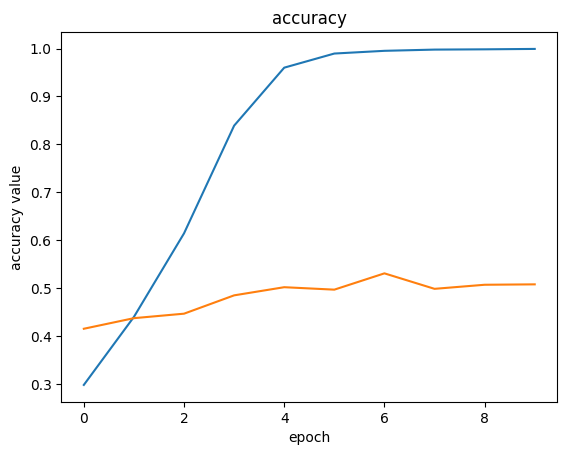

In [ ]:
plt.plot(hist['accuracy'],label=['accuracy'])
plt.plot(hist['val_accuracy'],label=['val_accuracy'])
plt.title('accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.legend

PREDICTION

In [5]:
# from tensorflow.keras.models import load_model
# model1 = load_model('/content/cars(10epoch).h5')
from tensorflow import keras
model1 = keras.models.load_model('/content/cars(10epoch).h5')

1/1 [==============================] - 8s 8s/step
[[1. 0. 0. 0. 0.]]
Hatchback


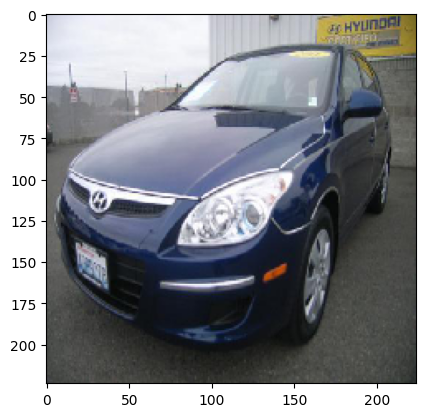

In [7]:
# importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

## loading the saved model
# from tensorflow.keras.models import load_model
# model1 = tensorflow.keras.models.load_model('/content/cars.h5')

# describing labels
labels = {'Hatchback':0, 'Sedan':1, 'SUV':2, 'Van':3, 'Humans':4}

# checking prediction
def predict(image):
  img = load_img(str(image),target_size=(224,224))
  plt.imshow(img)
  img = img_to_array(img)
  #qwimg = img/255
  #print(img,img.shape)

  img = img.reshape(1,224,224,3)
  result = model1.predict(img)
  print(result)

  for i in labels:
    if np.argmax(result) == labels[i]:
      print(i)

predict('/content/drive/MyDrive/Cars/Hatchback/00032_Hyundai Elantra Touring Hatchback 2012.jpg') 

Prediction 1 - Hatchback car is predicted correctly

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0.]]
Hatchback


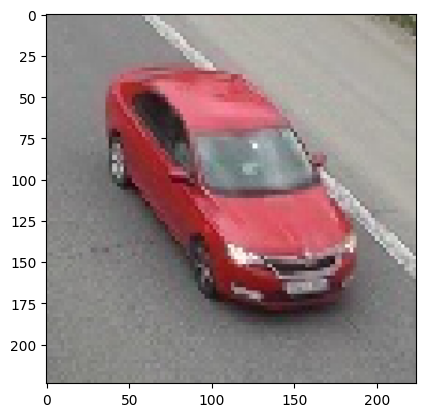

In [15]:
# PREDICTION 2
predict('/content/drive/MyDrive/Cars/Sedan/Image_009705.jpg')

Predition 2 - Sedan car is not predicted correctly

1/1 [==============================] - 0s 31ms/step
[[0. 0. 1. 0. 0.]]
SUV


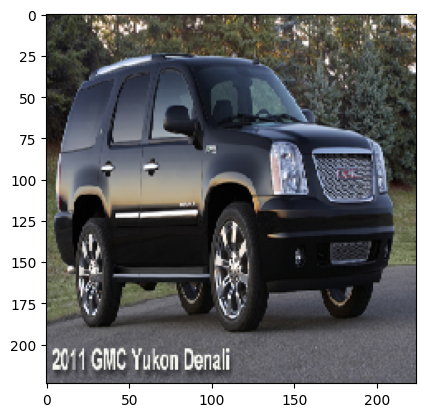

In [16]:
# PREDICTION 3
predict('/content/drive/MyDrive/Cars/SUV/00023_GMC Yukon Hybrid SUV 2012.jpg')

Prediction 3 - SUV is predicted correctly

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 1.]]
Humans


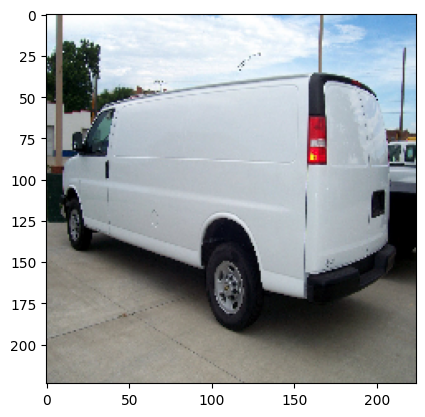

In [19]:
#PREDICTION 4
predict('/content/drive/MyDrive/Cars/Van/02609_Chevrolet Express Cargo Van 2007 (1).jpg')

1/1 [==============================] - 0s 56ms/step
[[0. 1. 0. 0. 0.]]
Sedan


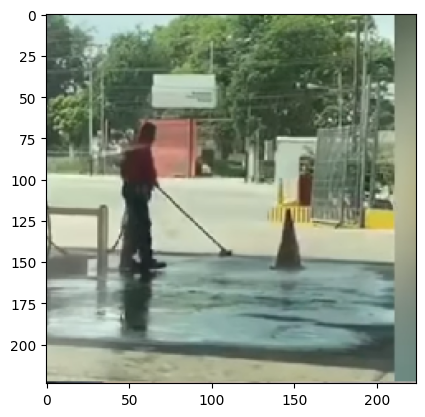

In [20]:
predict('/content/drive/MyDrive/Cars/Humans/102.png')